In [5]:
# Render our plots inline
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# Make the graphs a bit prettier, and bigger
pd.options.display.mpl_style = 'default'


In [6]:
import pandas as pd

csv = pd.read_csv("data/bloodsugar.csv", sep=";")

df = pd.DataFrame()

df['datetime'] = csv['Date']+" "+csv['Time']
df['datetime'].map(pd.tseries.tools.to_datetime)
df['bloodsugar']= csv["bG (mg/dL)"]
df.set_index(pd.DatetimeIndex(df['datetime']), inplace=True)

In [7]:
import numpy as np

s = pd.Series(df["bloodsugar"])
agg = s.resample("M", how=["mean", "median", "std"])[1:].dropna()
agg

,mean,median,std
datetime,,,
2013-01-31,121.290323,117.0,27.156575
2013-02-28,110.305785,109.0,16.176033
2013-03-31,113.970297,113.0,20.350162
2013-04-30,112.402985,108.0,21.864638
2013-05-31,119.531646,119.0,22.761774
2013-06-30,117.652174,114.0,19.091749
2013-08-31,123.600000,121.0,14.310835
2013-09-30,112.769231,109.0,18.037710
2013-10-31,130.272727,121.0,44.838790


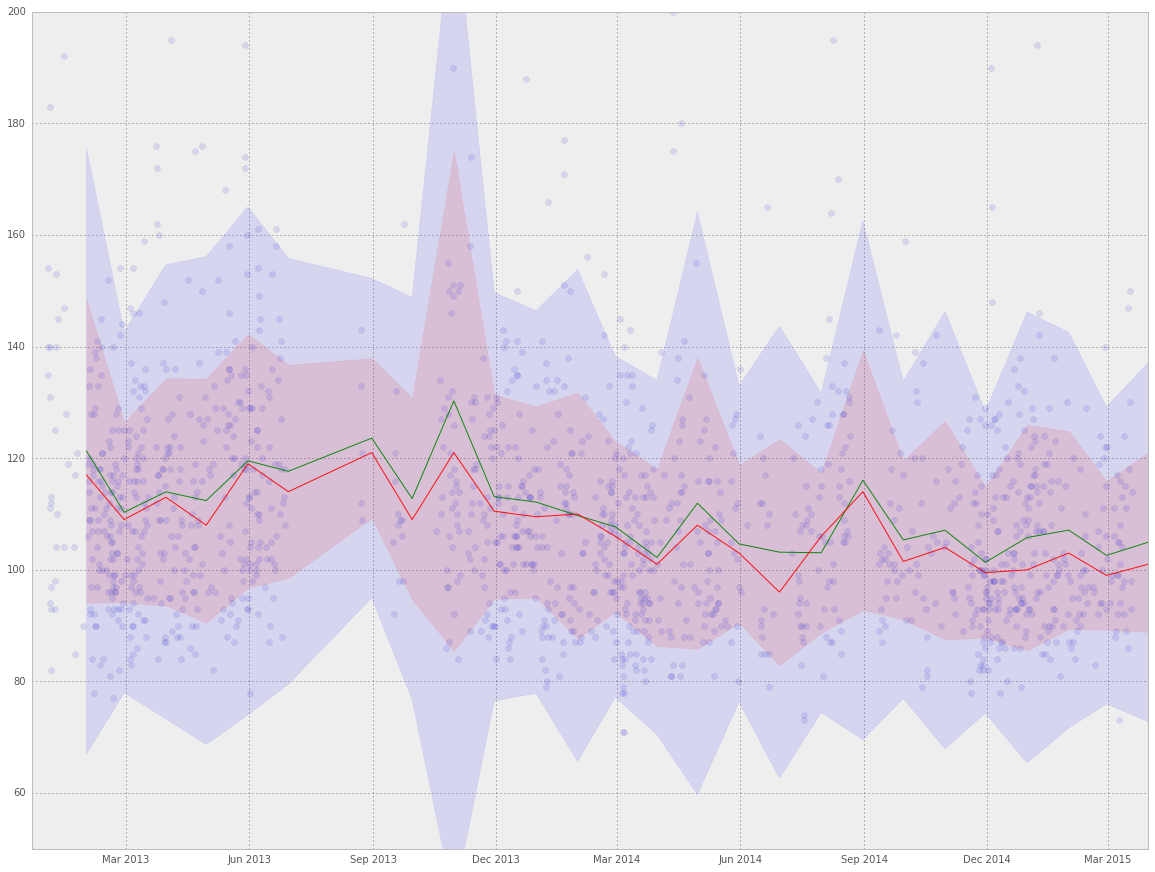

In [12]:
coef = 1

plt.figure(figsize=(20,15))
plt.ylim([50,200])
plt.plot(df.index, df["bloodsugar"], color='blue', alpha=0.1, marker='o',  linestyle='none' )
plt.plot(agg.index, agg["mean"], color='green', alpha=0.9)
plt.plot(agg.index, agg["median"], color='red', alpha=0.9)
plt.fill_between(agg.index, agg["mean"]-2*coef*agg["std"], agg["mean"]+2*coef*agg["std"], color='b', alpha=0.1)
plt.fill_between(agg.index, agg["mean"]-coef*agg["std"], agg["mean"]+coef*agg["std"], color='r', alpha=0.1)
